Flight price prediction

Objective of this project : to find the flight price based on different flights 

importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

import dataset

In [2]:
df = pd.DataFrame(pd.read_excel("data train.xlsx"))
pd.set_option('display.max_columns',None)

In [3]:
df.head(20)

,Airline,Source,Destination,Month,Month Name,Dep_Time,arrival time,hours,min,Total stops,Price
0,IndiGo,Banglore,New Delhi,3,March,22:20:00,01:10:00,2,50,0.0,3897
1,Air India,Kolkata,Banglore,5,May,05:50:00,13:15:00,7,25,2.0,7662
2,Jet Airways,Delhi,Cochin,6,June,09:25:00,04:25:00,19,0,2.0,13882
3,IndiGo,Kolkata,Banglore,5,May,18:05:00,23:30:00,5,25,1.0,6218
4,IndiGo,Banglore,New Delhi,3,March,16:50:00,21:35:00,4,45,1.0,13302
5,SpiceJet,Kolkata,Banglore,6,June,09:00:00,11:25:00,2,25,0.0,3873
6,Jet Airways,Banglore,New Delhi,3,March,18:55:00,10:25:00,15,30,1.0,11087
7,Jet Airways,Banglore,New Delhi,3,March,08:00:00,05:05:00,21,5,1.0,22270
8,Jet Airways,Banglore,New Delhi,3,March,08:55:00,10:25:00,25,30,1.0,11087
9,Multiple carriers,Delhi,Cochin,5,May,11:25:00,19:15:00,7,50,1.0,8625


In [4]:
df.tail(20)

,Airline,Source,Destination,Month,Month Name,Dep_Time,arrival time,hours,min,Total stops,Price
10663,Jet Airways,Delhi,Cochin,6,June,19:30:00,12:35:00,17,5,2.0,11733
10664,IndiGo,Banglore,Delhi,4,April,18:55:00,21:50:00,2,55,0.0,4823
10665,IndiGo,Kolkata,Banglore,4,April,15:15:00,17:45:00,2,30,0.0,4804
10666,Jet Airways,Delhi,Cochin,6,June,18:15:00,19:00:00,24,45,1.0,10262
10667,Jet Airways,Banglore,New Delhi,3,March,22:55:00,20:20:00,21,25,1.0,11087
10668,Jet Airways,Delhi,Cochin,5,May,11:40:00,19:00:00,7,20,2.0,21219
10669,Air India,Delhi,Cochin,6,June,08:00:00,19:15:00,11,15,1.0,9929
10670,Air India,Kolkata,Banglore,5,May,05:50:00,23:15:00,17,25,2.0,11411
10671,Air India,Mumbai,Hyderabad,6,June,21:05:00,22:25:00,1,20,0.0,3100
10672,Jet Airways,Delhi,Cochin,6,June,23:05:00,19:00:00,19,55,2.0,11150


In [5]:
df.shape #returns the total number of columns and the rows

(10683, 11)

In [6]:
df.info() #provides the description of the table(columns,datatypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       10683 non-null  object 
 1   Source        10683 non-null  object 
 2   Destination   10683 non-null  object 
 3   Month         10683 non-null  int64  
 4   Month Name    10683 non-null  object 
 5   Dep_Time      10683 non-null  object 
 6   arrival time  10683 non-null  object 
 7   hours         10683 non-null  int64  
 8   min           10683 non-null  int64  
 9   Total stops   10682 non-null  float64
 10  Price         10683 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 918.2+ KB


In [7]:
df.isnull()

,Airline,Source,Destination,Month,Month Name,Dep_Time,arrival time,hours,min,Total stops,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum() #provides the total number of null items

Airline         0
Source          0
Destination     0
Month           0
Month Name      0
Dep_Time        0
arrival time    0
hours           0
min             0
Total stops     1
Price           0
dtype: int64

In [9]:
df.isnull().sum()/len(df)*100

Airline         0.000000
Source          0.000000
Destination     0.000000
Month           0.000000
Month Name      0.000000
Dep_Time        0.000000
arrival time    0.000000
hours           0.000000
min             0.000000
Total stops     0.009361
Price           0.000000
dtype: float64

In [10]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


<Axes: >

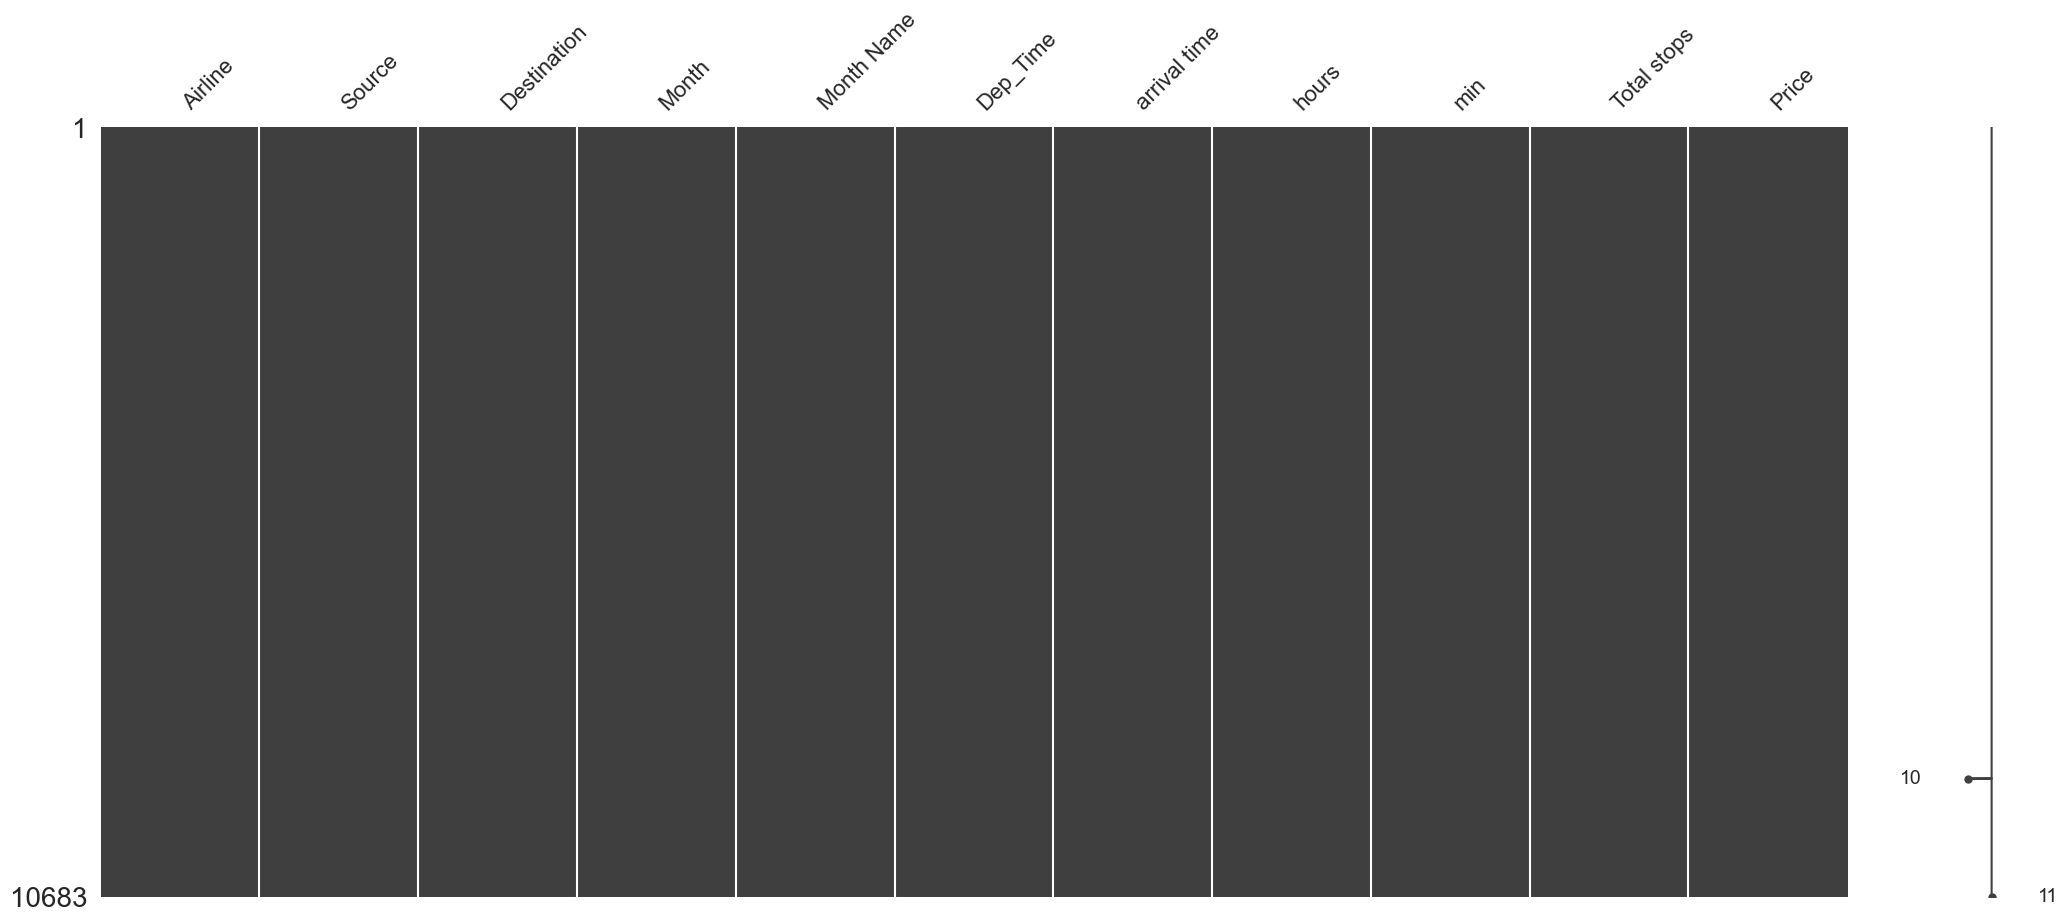

In [12]:
import missingno as msno
msno.matrix(df)

In [13]:
print(df.columns)


Index(['Airline', 'Source', 'Destination', 'Month', 'Month Name', 'Dep_Time',
       'arrival time', 'hours', 'min', 'Total stops', 'Price'],
      dtype='object')


statistical description

In [14]:
df['Route'] = df['Source'] + '-->' + df['Destination']
df.head(5)

,Airline,Source,Destination,Month,Month Name,Dep_Time,arrival time,hours,min,Total stops,Price,Route
0,IndiGo,Banglore,New Delhi,3,March,22:20:00,01:10:00,2,50,0.0,3897,Banglore-->New Delhi
1,Air India,Kolkata,Banglore,5,May,05:50:00,13:15:00,7,25,2.0,7662,Kolkata-->Banglore
2,Jet Airways,Delhi,Cochin,6,June,09:25:00,04:25:00,19,0,2.0,13882,Delhi-->Cochin
3,IndiGo,Kolkata,Banglore,5,May,18:05:00,23:30:00,5,25,1.0,6218,Kolkata-->Banglore
4,IndiGo,Banglore,New Delhi,3,March,16:50:00,21:35:00,4,45,1.0,13302,Banglore-->New Delhi


In [15]:
from sklearn.impute import SimpleImputer
sm_imp=SimpleImputer(strategy="most_frequent")
df[['Route','Total stops']]=sm_imp.fit_transform(df[['Route','Total stops']])
df.isnull().sum()

Airline         0
Source          0
Destination     0
Month           0
Month Name      0
Dep_Time        0
arrival time    0
hours           0
min             0
Total stops     0
Price           0
Route           0
dtype: int64

In [16]:
df.describe()

,Month,hours,min,Price
count,10683.000000,10683.000000,10683.000000,10683.000000
mean,4.708602,10.246560,28.327249,9087.064121
std,1.164357,8.494988,16.946113,4611.359167
min,3.000000,1.000000,0.000000,1759.000000
25%,3.000000,2.000000,15.000000,5277.000000
50%,5.000000,8.000000,30.000000,8372.000000
75%,6.000000,15.000000,45.000000,12373.000000
max,6.000000,47.000000,55.000000,79512.000000


observations:

1.max_price : 79512

2.min_price: 1759

3.avg_price : 9087

In [17]:
df.describe(include='O')

,Airline,Source,Destination,Month Name,Dep_Time,arrival time,Total stops,Route
count,10683,10683,10683,10683,10683,10683,10683.0,10683
unique,12,5,6,4,222,223,5.0,6
top,Jet Airways,Delhi,Cochin,May,18:55:00,19:00:00,1.0,Delhi-->Cochin
freq,3849,4537,4537,3466,233,618,5626.0,4537


observations:
1. total count share of each categary with out null values
2. unique shows the values for each column
3. we get the top most value from each column
4. returns thenumber of times the most frequent values in the columns

EXPLORATION IN DATA ANALYSIS(EDA)---DATA CLEANING

In [18]:

df['Duration']=df['hours'].astype(str)+'h '+df['min'].astype(str)+ ' m'
df.head(10)


,Airline,Source,Destination,Month,Month Name,Dep_Time,arrival time,hours,min,Total stops,Price,Route,Duration
0,IndiGo,Banglore,New Delhi,3,March,22:20:00,01:10:00,2,50,0.0,3897,Banglore-->New Delhi,2h 50 m
1,Air India,Kolkata,Banglore,5,May,05:50:00,13:15:00,7,25,2.0,7662,Kolkata-->Banglore,7h 25 m
2,Jet Airways,Delhi,Cochin,6,June,09:25:00,04:25:00,19,0,2.0,13882,Delhi-->Cochin,19h 0 m
3,IndiGo,Kolkata,Banglore,5,May,18:05:00,23:30:00,5,25,1.0,6218,Kolkata-->Banglore,5h 25 m
4,IndiGo,Banglore,New Delhi,3,March,16:50:00,21:35:00,4,45,1.0,13302,Banglore-->New Delhi,4h 45 m
5,SpiceJet,Kolkata,Banglore,6,June,09:00:00,11:25:00,2,25,0.0,3873,Kolkata-->Banglore,2h 25 m
6,Jet Airways,Banglore,New Delhi,3,March,18:55:00,10:25:00,15,30,1.0,11087,Banglore-->New Delhi,15h 30 m
7,Jet Airways,Banglore,New Delhi,3,March,08:00:00,05:05:00,21,5,1.0,22270,Banglore-->New Delhi,21h 5 m
8,Jet Airways,Banglore,New Delhi,3,March,08:55:00,10:25:00,25,30,1.0,11087,Banglore-->New Delhi,25h 30 m
9,Multiple carriers,Delhi,Cochin,5,May,11:25:00,19:15:00,7,50,1.0,8625,Delhi-->Cochin,7h 50 m


In [19]:
df['Dep_Time'] = df['Dep_Time'].astype(str).str.slice(0, 5)
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [20]:
df.head()

,Airline,Source,Destination,Month,Month Name,Dep_Time,arrival time,hours,min,Total stops,Price,Route,Duration,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,3,March,22:20,01:10:00,2,50,0.0,3897,Banglore-->New Delhi,2h 50 m,22,20
1,Air India,Kolkata,Banglore,5,May,05:50,13:15:00,7,25,2.0,7662,Kolkata-->Banglore,7h 25 m,5,50
2,Jet Airways,Delhi,Cochin,6,June,09:25,04:25:00,19,0,2.0,13882,Delhi-->Cochin,19h 0 m,9,25
3,IndiGo,Kolkata,Banglore,5,May,18:05,23:30:00,5,25,1.0,6218,Kolkata-->Banglore,5h 25 m,18,5
4,IndiGo,Banglore,New Delhi,3,March,16:50,21:35:00,4,45,1.0,13302,Banglore-->New Delhi,4h 45 m,16,50


In [21]:
df.drop('Dep_Time',axis=1,inplace=True)

In [22]:
df['arrival time'] = df['arrival time'].astype(str).str.slice(0, 5)
df['arrival_hour']=pd.to_datetime(df['arrival time']).dt.hour
df['arrival_min']=pd.to_datetime(df['arrival time']).dt.minute

In [23]:
df.drop('arrival time',axis=1,inplace=True)

In [24]:
df.head(5)

,Airline,Source,Destination,Month,Month Name,hours,min,Total stops,Price,Route,Duration,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,3,March,2,50,0.0,3897,Banglore-->New Delhi,2h 50 m,22,20,1,10
1,Air India,Kolkata,Banglore,5,May,7,25,2.0,7662,Kolkata-->Banglore,7h 25 m,5,50,13,15
2,Jet Airways,Delhi,Cochin,6,June,19,0,2.0,13882,Delhi-->Cochin,19h 0 m,9,25,4,25
3,IndiGo,Kolkata,Banglore,5,May,5,25,1.0,6218,Kolkata-->Banglore,5h 25 m,18,5,23,30
4,IndiGo,Banglore,New Delhi,3,March,4,45,1.0,13302,Banglore-->New Delhi,4h 45 m,16,50,21,35


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       10683 non-null  object
 1   Source        10683 non-null  object
 2   Destination   10683 non-null  object
 3   Month         10683 non-null  int64 
 4   Month Name    10683 non-null  object
 5   hours         10683 non-null  int64 
 6   min           10683 non-null  int64 
 7   Total stops   10683 non-null  object
 8   Price         10683 non-null  int64 
 9   Route         10683 non-null  object
 10  Duration      10683 non-null  object
 11  Dep_hour      10683 non-null  int32 
 12  Dep_min       10683 non-null  int32 
 13  arrival_hour  10683 non-null  int32 
 14  arrival_min   10683 non-null  int32 
dtypes: int32(4), int64(4), object(7)
memory usage: 1.1+ MB


In [26]:
duration = list(df['Duration'])
for i in range(len(duration)):
    if(len(duration[i].split())!=2):
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+"0m"
        else:
            duration[i]="0h"+duration[i]

In [27]:
duration_hour=[]
duration_min=[]
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep="h")[0]))
    duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [28]:
df['Duration_hour']=duration_hour
df['Duration_min']=duration_min
df.head(5)

,Airline,Source,Destination,Month,Month Name,hours,min,Total stops,Price,Route,Duration,Dep_hour,Dep_min,arrival_hour,arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,3,March,2,50,0.0,3897,Banglore-->New Delhi,2h 50 m,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,5,May,7,25,2.0,7662,Kolkata-->Banglore,7h 25 m,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,6,June,19,0,2.0,13882,Delhi-->Cochin,19h 0 m,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5,May,5,25,1.0,6218,Kolkata-->Banglore,5h 25 m,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,3,March,4,45,1.0,13302,Banglore-->New Delhi,4h 45 m,16,50,21,35,4,45


In [29]:
df.drop('hours',axis=1,inplace=True)
df.drop('min',axis=1,inplace=True)
df.head(5)

,Airline,Source,Destination,Month,Month Name,Total stops,Price,Route,Duration,Dep_hour,Dep_min,arrival_hour,arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,3,March,0.0,3897,Banglore-->New Delhi,2h 50 m,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,5,May,2.0,7662,Kolkata-->Banglore,7h 25 m,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,6,June,2.0,13882,Delhi-->Cochin,19h 0 m,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5,May,1.0,6218,Kolkata-->Banglore,5h 25 m,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,3,March,1.0,13302,Banglore-->New Delhi,4h 45 m,16,50,21,35,4,45


In [30]:
df.drop('Duration',axis=1,inplace=True)

In [31]:
df.head(5)

,Airline,Source,Destination,Month,Month Name,Total stops,Price,Route,Dep_hour,Dep_min,arrival_hour,arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,3,March,0.0,3897,Banglore-->New Delhi,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,5,May,2.0,7662,Kolkata-->Banglore,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,6,June,2.0,13882,Delhi-->Cochin,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5,May,1.0,6218,Kolkata-->Banglore,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,3,March,1.0,13302,Banglore-->New Delhi,16,50,21,35,4,45


Seaborn:
Seaborn is a powerful Python data visualization library built on top of Matplotlib. It provides an easier way to create visually appealing and informative statistical graphics. Seaborn integrates well with Pandas, allowing you to directly plot DataFrame data with simple, intuitive syntax.

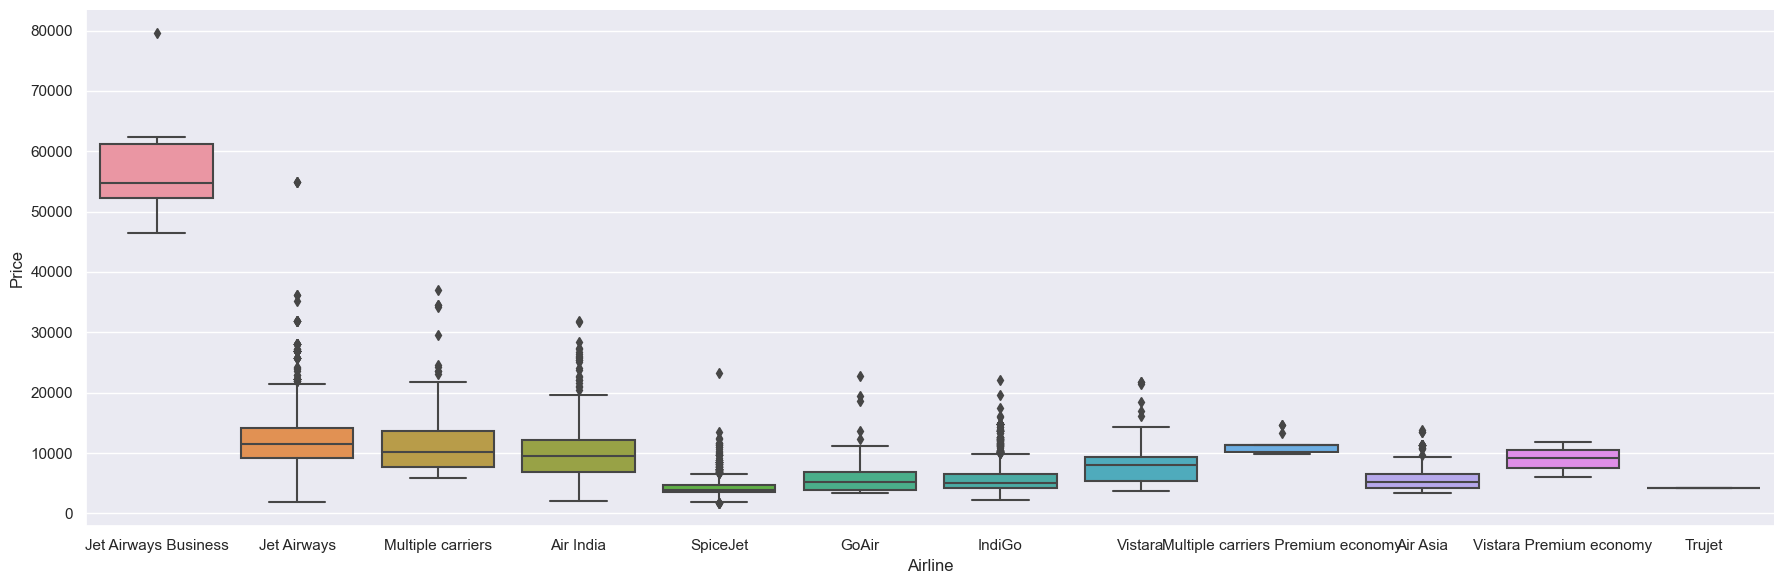

In [32]:
sns.catplot(y="Price",x="Airline",data=df.sort_values("Price",ascending=False),kind="box",height=6,aspect=3)
plt.show()

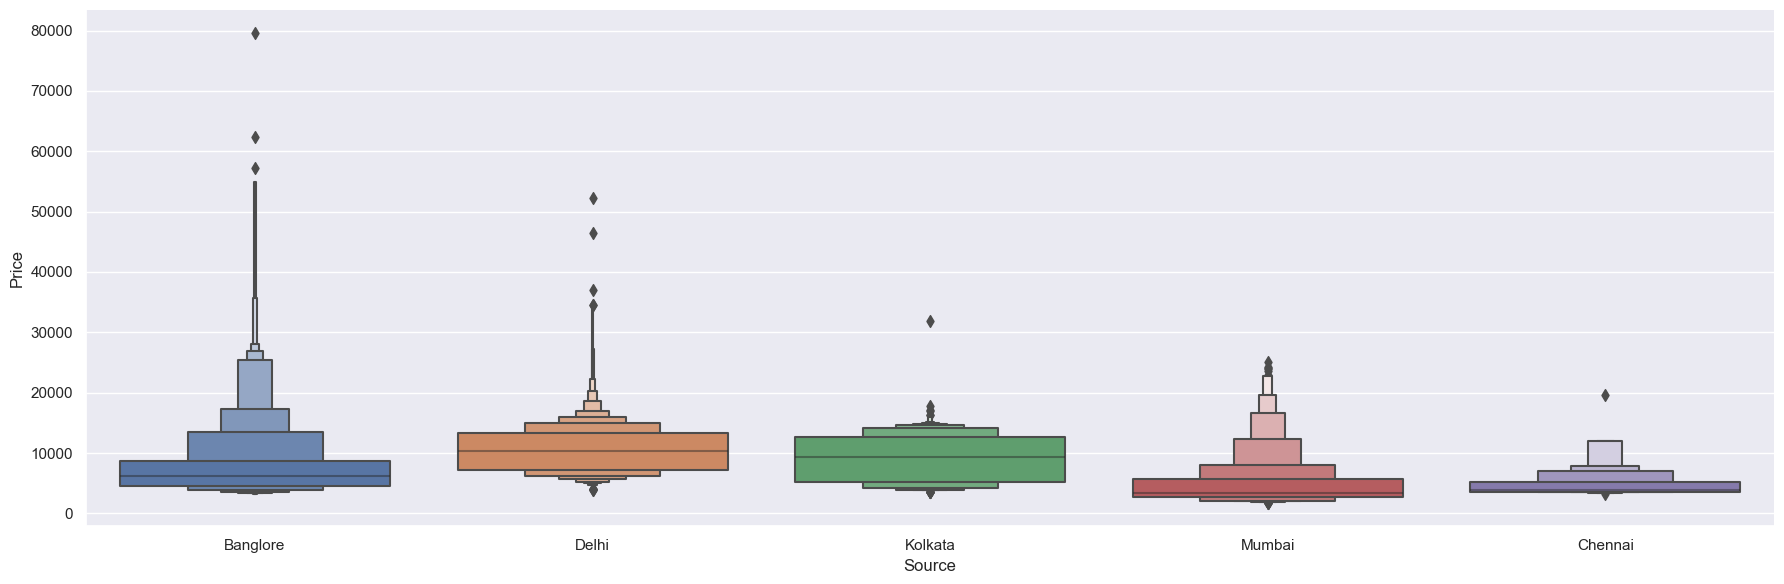

In [33]:
#plot of source vs price
sns.catplot(y="Price",x="Source",data=df.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

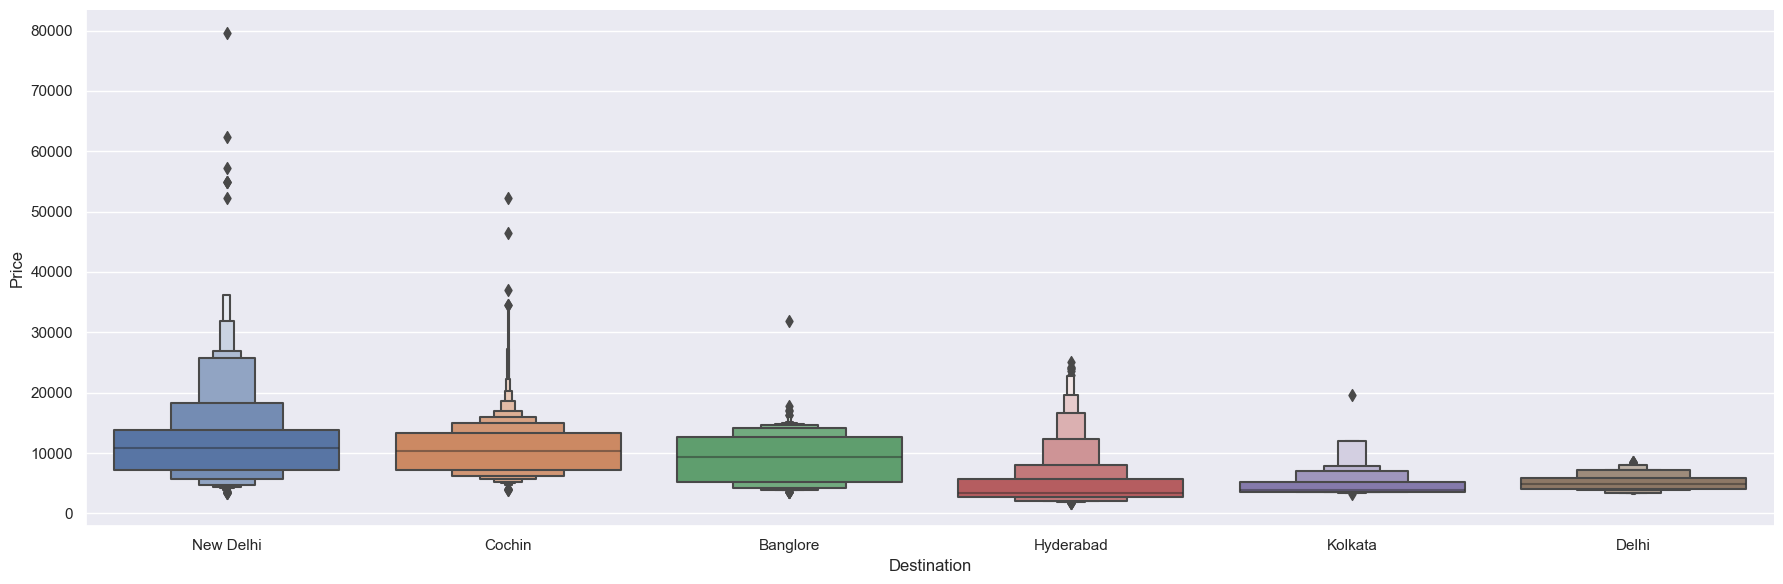

In [34]:
#plot of Destination vs Price
sns.catplot(y="Price",x="Destination",data=df.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

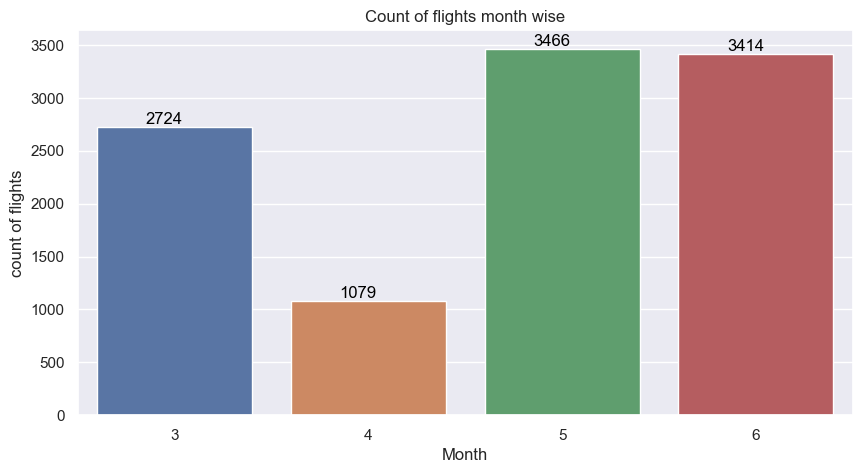

In [35]:
#plotting barchart for months (Duration) vs Number of Flights
plt.figure(figsize=(10,5))
plt.title("Count of flights month wise")
ax=sns.countplot(x="Month",data=df)
plt.xlabel("Month")
plt.ylabel("count of flights")
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),va="bottom",color='black')

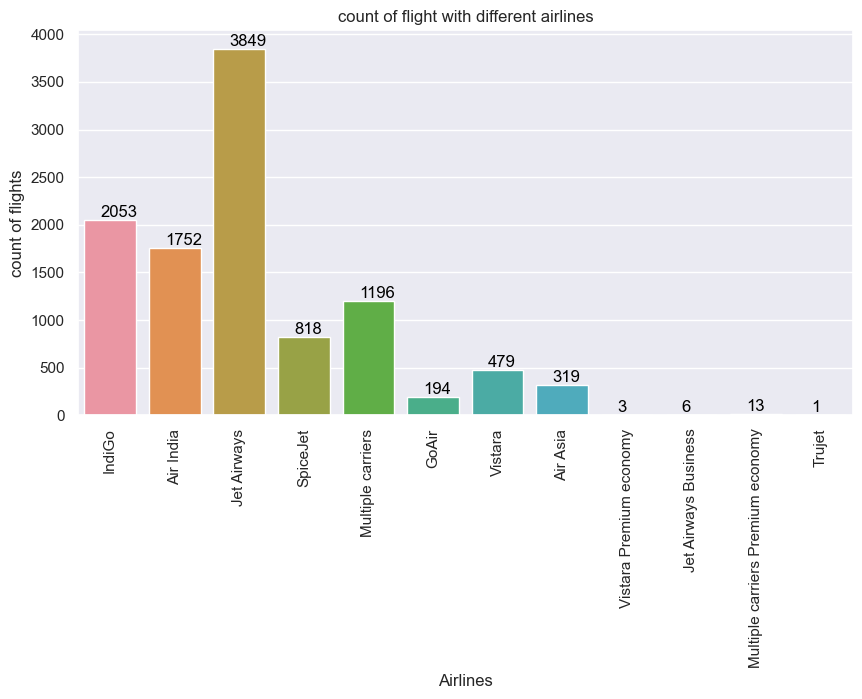

In [36]:
#plotting barchart for Types of Airlines vs number of flights
plt.figure(figsize=(10,5))
plt.title("count of flight with different airlines")
ax=sns.countplot(x='Airline',data=df)
plt.xlabel("Airlines")
plt.ylabel("count of flights")
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),va="bottom",color="black")


observation 
here in the above graph of Airline vs count of flights the jet Airways has most numbet=r of flights and Trujet has least.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

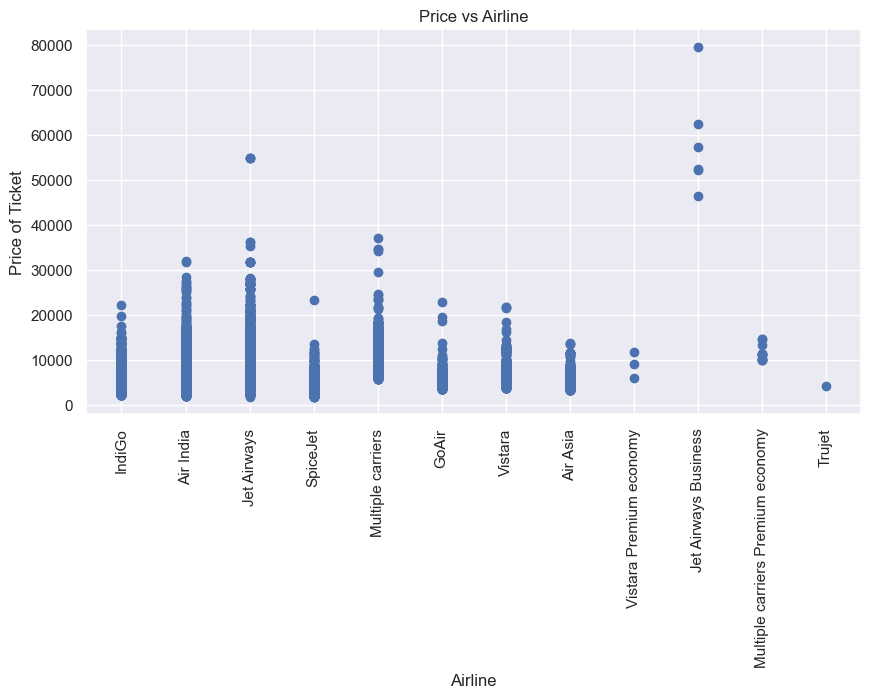

In [37]:
#plotting ticket Price vs Airline
plt.figure(figsize=(10,5))
plt.title("Price vs Airline")
plt.scatter(df['Airline'],df['Price'])
plt.xlabel("Airline")
plt.ylabel("Price of Ticket")
plt.xticks(rotation=90)

In [38]:
df.drop('arrival_min',axis=1,inplace=True)

In [39]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [40]:
df.head()

,Airline,Source,Destination,Month,Month Name,Total stops,Price,Route,Dep_hour,Dep_min,arrival_hour,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,3,March,0.0,3897,Banglore-->New Delhi,22,20,1,2,50
1,Air India,Kolkata,Banglore,5,May,2.0,7662,Kolkata-->Banglore,5,50,13,7,25
2,Jet Airways,Delhi,Cochin,6,June,2.0,13882,Delhi-->Cochin,9,25,4,19,0
3,IndiGo,Kolkata,Banglore,5,May,1.0,6218,Kolkata-->Banglore,18,5,23,5,25
4,IndiGo,Banglore,New Delhi,3,March,1.0,13302,Banglore-->New Delhi,16,50,21,4,45


In [41]:
#oneHotEncoder
Airline = df[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [42]:
#next we have source as nominal data to convert
Source= df[['Source']]
Source= pd.get_dummies(Source,drop_first=True)
Source.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [43]:
#now we can change total stops which is a ordinal data into a numeric data by using LabelEncoder but the data is already modified to numbers

In [44]:
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)

# Concatenating DataFrames df, Airline, Source, and Destination
df_one = pd.concat([df, Airline, Source, Destination], axis=1)

# Display the first few rows of the concatenated DataFrame
print(df_one.head())


       Airline    Source Destination  Month Month Name Total stops  Price  \
0       IndiGo  Banglore   New Delhi      3      March         0.0   3897   
1    Air India   Kolkata    Banglore      5        May         2.0   7662   
2  Jet Airways     Delhi      Cochin      6       June         2.0  13882   
3       IndiGo   Kolkata    Banglore      5        May         1.0   6218   
4       IndiGo  Banglore   New Delhi      3      March         1.0  13302   

                  Route  Dep_hour  Dep_min  arrival_hour  Duration_hour  \
0  Banglore-->New Delhi        22       20             1              2   
1    Kolkata-->Banglore         5       50            13              7   
2        Delhi-->Cochin         9       25             4             19   
3    Kolkata-->Banglore        18        5            23              5   
4  Banglore-->New Delhi        16       50            21              4   

   Duration_min  Airline_Air India  Airline_GoAir  Airline_IndiGo  \
0            50  

In [45]:
df_one.isnull().sum()

Airline                                      0
Source                                       0
Destination                                  0
Month                                        0
Month Name                                   0
Total stops                                  0
Price                                        0
Route                                        0
Dep_hour                                     0
Dep_min                                      0
arrival_hour                                 0
Duration_hour                                0
Duration_min                                 0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Truje

In [46]:
df_one.shape

(10683, 33)

In [47]:
df_one.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [48]:
df_one.head()

,Month,Month Name,Total stops,Price,Route,Dep_hour,Dep_min,arrival_hour,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3,March,0.0,3897,Banglore-->New Delhi,22,20,1,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,5,May,2.0,7662,Kolkata-->Banglore,5,50,13,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,6,June,2.0,13882,Delhi-->Cochin,9,25,4,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,5,May,1.0,6218,Kolkata-->Banglore,18,5,23,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,3,March,1.0,13302,Banglore-->New Delhi,16,50,21,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [49]:
df_one.shape

(10683, 30)